In [1]:
#Task 1: Data Preparation
# "You will start by loading the CSV data from the file (using appropriate pandas functions) and checking whether the loaded data is equivalent to the data in the source CSV file.
# Then, you need to clean the data by using the knowledge we taught in the lectures. You need to deal with all the potential issues/errors in the data appropriately (such as: typos, extra whitespaces, sanity checks for impossible values, and missing values etc). "

# Please structure code as follows: 
# always provide one line of comments to explain the purpose of the code, e.g. load the data, checking the equivalent to original data, checking typos (do this for each other types of errors)

#Code goes after this line by adding cells

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#I created Python notebook where I had data table saved hence no full path
starwars_p = 'StarWars.csv'

In [3]:
#For my convinence I gave column names for and skipped starting 2 rows of the data set.
#Q3 is in place to recognize The question of which movies the responder has watched.
#Q4 is in place to the ranking the responder has given 
#And have kept all ResponderId as my index
starwars = pd.read_csv(starwars_p, sep=',', decimal = '.',header =None, 
names=['RespondentID','Have you seen any of the 6 films','Do you consider yourself to be a Star war fan?',
'Q3:Star Wars: Episode I  The Phantom Menace','Q3:Star Wars: Episode II  Attack of the Clones',
'Q3:Star Wars: Episode III  Revenge of the Sith','Q3:Star Wars: Episode IV  A New Hope',
'Q3:Star Wars: Episode V The Empire Strikes Back','Q3:Star Wars: Episode VI Return of the Jedi',
'Q4:Star Wars: Episode I  The Phantom Menace','Q4:Star Wars: Episode II  Attack of the Clones',
'Q4:Star Wars: Episode III  Revenge of the Sith','Q4:Star Wars: Episode IV  A New Hope',
'Q4:Star Wars: Episode V The Empire Strikes Back','Q4:Star Wars: Episode VI Return of the Jedi',
'Han Solo','Luke Skywalker','Princess Leia Organa','Anakin Skywalker','Obi Wan Kenobi','Emperor Palpatine',
'Darth Vader','Lando Calrissian','Boba Fett','C-3P0','R2 D2','Jar Jar Binks','Padme Amidala','Yoda',
'Which character shot first?','Are you familiar with the Expanded Universe?',
'Do you consider yourself to be a fan of the Expanded Universe?',
'Do you consider yourself to be a fan of the Star Trek franchise?',
'Gender','Age','Household Income','Education','Census Region'],index_col=0,skiprows=2 ,error_bad_lines = False)

In [4]:
#A small code to look at the type of data stored in each and every column
print(starwars.shape)
for i in range(37):
    print(type(starwars.iloc[0,i]))

(1186, 37)
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'str'>


In [5]:
#As a check I did .value_counts() for all the columns in the data table but writing code only for ones which had an issue.
# The Column 'Have you seen any of the 6 films' had an redundant white space error hence I used string strip()
starwars['Have you seen any of the 6 films'] = starwars['Have you seen any of the 6 films'].str.strip()
starwars['Have you seen any of the 6 films'].value_counts()

Yes    936
No     250
Name: Have you seen any of the 6 films, dtype: int64

In [6]:
starwars['Household Income'].value_counts()

$50,000 - $99,999      298
$25,000 - $49,999      186
$100,000 - $149,999    141
$0 - $24,999           138
$150,000+               95
Name: Household Income, dtype: int64

In [10]:
#In the column 'Do you consider yourself to be a Star war fan?' I found 2 data entry error 
#Using Strip function as a precautionary step after that I used replace method to manually change the typos
starwars['Do you consider yourself to be a Star war fan?'] = starwars['Do you consider yourself to be a Star war fan?'].str.strip()
starwars['Do you consider yourself to be a Star war fan?'].replace(
    {"Yess" : "Yes" , "Noo": "No"},inplace = True) 
starwars['Do you consider yourself to be a Star war fan?'].value_counts()

Yes    552
No     284
Name: Do you consider yourself to be a Star war fan?, dtype: int64

In [11]:
#In the column 'Do you consider yourself to be a fan of the Expanded Universe?' I found 1 data entry error 
#Using Strip function as a precautionary step after that I used replace method to manually change the typos
starwars['Do you consider yourself to be a fan of the Expanded Universe?'] = starwars['Do you consider yourself to be a fan of the Expanded Universe?'].str.strip()
starwars['Do you consider yourself to be a fan of the Expanded Universe?'].replace(
    {"Yess" : "Yes"},inplace = True) 
starwars['Do you consider yourself to be a fan of the Expanded Universe?'].value_counts()

No     114
Yes     99
Name: Do you consider yourself to be a fan of the Expanded Universe?, dtype: int64

In [12]:
#In the column 'Do you consider yourself to be a fan of the Star Trek franchise?' I found 1 white space error, 2 data entry errors and 1 Capital Letter mismatch error 
#Using Strip function to extra white space , after that used the capitalize() and after that I used replace method to manually change the typos
starwars['Do you consider yourself to be a fan of the Star Trek franchise?'] = starwars['Do you consider yourself to be a fan of the Star Trek franchise?'].str.strip()
starwars['Do you consider yourself to be a fan of the Star Trek franchise?'] = starwars['Do you consider yourself to be a fan of the Star Trek franchise?'].str.capitalize()
starwars['Do you consider yourself to be a fan of the Star Trek franchise?'].replace(
    {"Noo": "No"},inplace = True) 
starwars['Do you consider yourself to be a fan of the Star Trek franchise?'].value_counts()

No     641
Yes    427
Name: Do you consider yourself to be a fan of the Star Trek franchise?, dtype: int64

In [13]:
#In the column 'Gender' I found 2 data entry errors and 2 Capital Letter mismatch error 
#Using Strip function just as a precaution after that used the capitalize() and after that I used replace method to manually change the typos
starwars['Gender'] = starwars['Gender'].str.strip()
starwars['Gender'] = starwars['Gender'].str.capitalize()
starwars['Gender'].replace({"F": "Female"}, inplace = True)
starwars['Gender'].value_counts()

Female    549
Male      497
Name: Gender, dtype: int64

In [14]:
#In the column 'Age' there was a logical error a person had age 500 which will never happen 
#I thought of using check method but as the values in this column are of object type instead of int hence
#I as not able to write a sanity check method
#And As it was just one wrong value hence used the replace method and replace it with mode of column
starwars['Age'].replace({"500": str(starwars['Age'].mode()[0])}, inplace = True)
starwars['Age'].value_counts()

45-60    292
> 60     269
30-44    268
18-29    217
Name: Age, dtype: int64

In [15]:
#Sanity Check to see if there is a wrong value and if it is then replace it
x = starwars[['Q4:Star Wars: Episode I  The Phantom Menace','Q4:Star Wars: Episode II  Attack of the Clones',
'Q4:Star Wars: Episode III  Revenge of the Sith','Q4:Star Wars: Episode IV  A New Hope',
'Q4:Star Wars: Episode V The Empire Strikes Back','Q4:Star Wars: Episode VI Return of the Jedi']]
x = (x.dropna() >= 1) & (x.dropna() <=6)
for i in range(6):
    print(x.iloc[:,i].value_counts())
#If there was a wrong value would have tried to repalce it with mode

True    834
Name: Q4:Star Wars: Episode I  The Phantom Menace, dtype: int64
True    834
Name: Q4:Star Wars: Episode II  Attack of the Clones, dtype: int64
True    834
Name: Q4:Star Wars: Episode III  Revenge of the Sith, dtype: int64
True    834
Name: Q4:Star Wars: Episode IV  A New Hope, dtype: int64
True    834
Name: Q4:Star Wars: Episode V The Empire Strikes Back, dtype: int64
True    834
Name: Q4:Star Wars: Episode VI Return of the Jedi, dtype: int64


In [16]:
starwars.isnull().sum()
#the amount of null data availble in the table is too much and according to me we can't fill it with mean, median,mode or
# any constant values because it will impact our interpretation of things for future goals we can use modeling techniques to
#fill it with suitable data but for now i am leaving it as empty and will be dropping it for further calculations.

Have you seen any of the 6 films                                      0
Do you consider yourself to be a Star war fan?                      350
Q3:Star Wars: Episode I  The Phantom Menace                         513
Q3:Star Wars: Episode II  Attack of the Clones                      615
Q3:Star Wars: Episode III  Revenge of the Sith                      636
Q3:Star Wars: Episode IV  A New Hope                                579
Q3:Star Wars: Episode V The Empire Strikes Back                     428
Q3:Star Wars: Episode VI Return of the Jedi                         448
Q4:Star Wars: Episode I  The Phantom Menace                         351
Q4:Star Wars: Episode II  Attack of the Clones                      350
Q4:Star Wars: Episode III  Revenge of the Sith                      351
Q4:Star Wars: Episode IV  A New Hope                                350
Q4:Star Wars: Episode V The Empire Strikes Back                     350
Q4:Star Wars: Episode VI Return of the Jedi                     

---

In [17]:
# Task 2: Data Exploration
# 1. Explore the survey question: \textit{Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.	(Star Wars: Episode I  The Phantom Menace; Star Wars: Episode II  Attack of the Clones; Star Wars: Episode III  Revenge of the Sith;	Star Wars: Episode IV  A New Hope; Star Wars: Episode V The Empire Strikes Back; Star Wars: Episode VI Return of the Jedi)}, then analysis how people rate Star Wars Movies. 


#Code goes after this line by adding cells

---

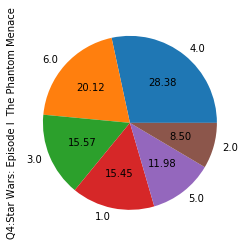

In [18]:
starwars['Q4:Star Wars: Episode I  The Phantom Menace'].dropna().value_counts().plot(kind='pie', autopct ='%.2f')

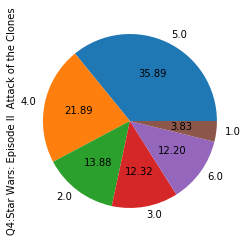

In [19]:
starwars['Q4:Star Wars: Episode II  Attack of the Clones'].dropna().value_counts().plot(kind='pie',autopct='%.2f')

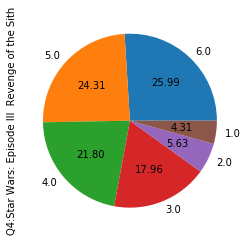

In [20]:
starwars['Q4:Star Wars: Episode III  Revenge of the Sith'].dropna().value_counts().plot(kind='pie',autopct='%.2f')

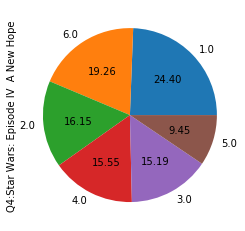

In [21]:
starwars['Q4:Star Wars: Episode IV  A New Hope'].dropna().value_counts().plot(kind='pie',autopct='%.2f')

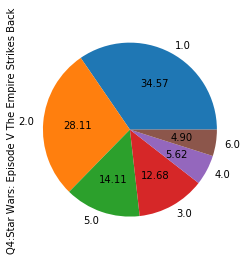

In [22]:
starwars['Q4:Star Wars: Episode V The Empire Strikes Back'].dropna().value_counts().plot(kind='pie',autopct='%.2f')

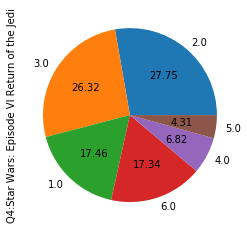

In [23]:
starwars['Q4:Star Wars: Episode VI Return of the Jedi'].dropna().value_counts().plot(kind='pie',autopct='%.2f')

---

In [24]:
# Task 2: Data Exploration
# 2. Explore the relationships between columns; at least 3 visualisations with plausible hypothesis

#Code goes after this line by adding cells

---

Text(0.5, 1.0, "Star war Fans on 'Who Shot First?'")

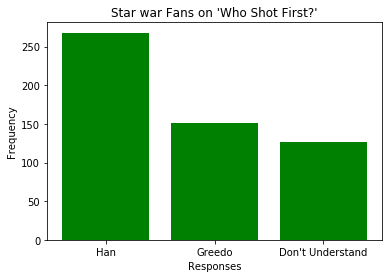

In [25]:
mask_fan_y =starwars['Do you consider yourself to be a Star war fan?'] == "Yes"
y_shot = starwars.loc[mask_fan_y,'Which character shot first?'].value_counts()
rate = y_shot[0],y_shot[1],y_shot[2]
plt.bar(list(range(3)),rate,color ='g', align ='center')
plt.xticks(list(range(3)),["Han","Greedo","Don't Understand"])
plt.xlabel("Responses")
plt.ylabel("Frequency")
plt.title("Star war Fans on 'Who Shot First?'")

Text(0.5, 1.0, 'Do Star war Fans know about expanded universe?')

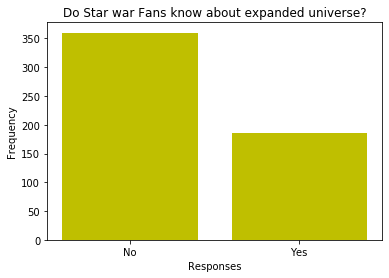

In [26]:
y_expanded = starwars.loc[mask_fan_y,'Are you familiar with the Expanded Universe?'].value_counts()
rate_y = y_expanded[0],y_expanded[1]
plt.bar(list(range(2)),rate_y,color ='y', align ='center')
plt.xticks(list(range(2)),["No","Yes"])
plt.xlabel("Responses")
plt.ylabel("Frequency")
plt.title("Do Star war Fans know about expanded universe?")

Text(0.5, 1.0, 'Do others(Not Star wars fans)know about expanded universe?')

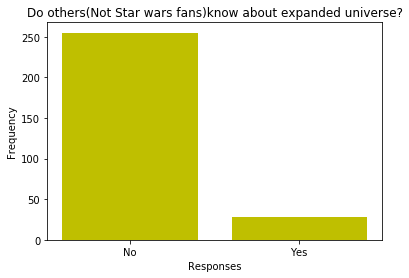

In [27]:
mask_fan_n =starwars['Do you consider yourself to be a Star war fan?'] == "No"
n_expanded = starwars.loc[mask_fan_n,'Are you familiar with the Expanded Universe?'].value_counts()
rate_n = n_expanded[0],n_expanded[1]
plt.bar(list(range(2)),rate_n,color ='y', align ='center')
plt.xticks(list(range(2)),["No","Yes"])
plt.xlabel("Responses")
plt.ylabel("Frequency")
plt.title("Do others(Not Star wars fans)know about expanded universe?")

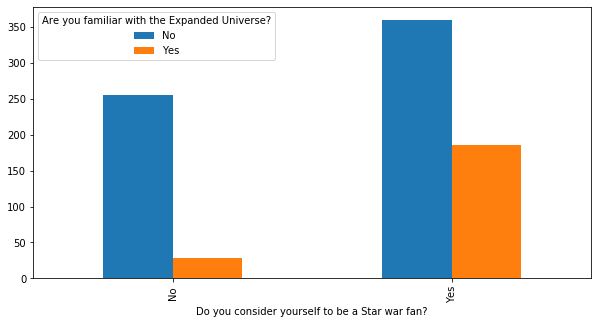

In [28]:
starwars.groupby(['Do you consider yourself to be a Star war fan?','Are you familiar with the Expanded Universe?']).size().unstack().plot(kind='bar',figsize=(10,5))

Text(0.5, 1.0, 'How Popular is star trek among star wars fan?')

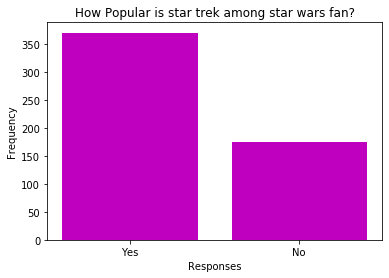

In [29]:
y_trek = starwars.loc[mask_fan_y,'Do you consider yourself to be a fan of the Star Trek franchise?'].value_counts()
rate_y = y_trek[0],y_trek[1]
plt.bar(list(range(2)),rate_y,color ='m', align ='center')
plt.xticks(list(range(2)),["Yes","No"])
plt.xlabel("Responses")
plt.ylabel("Frequency")
plt.title("How Popular is star trek among star wars fan?")

Text(0.5, 1.0, 'Is star trek popular among non star wars fans?')

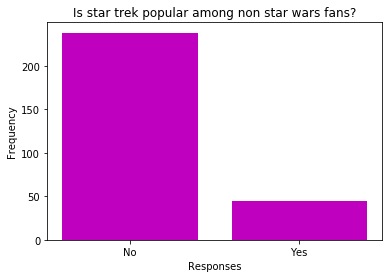

In [30]:
n_expanded = starwars.loc[mask_fan_n,'Do you consider yourself to be a fan of the Star Trek franchise?'].value_counts()
rate_n = n_expanded[0],n_expanded[1]
plt.bar(list(range(2)),rate_n,color ='m', align ='center')
plt.xticks(list(range(2)),["No","Yes"])
plt.xlabel("Responses")
plt.ylabel("Frequency")
plt.title("Is star trek popular among non star wars fans?")

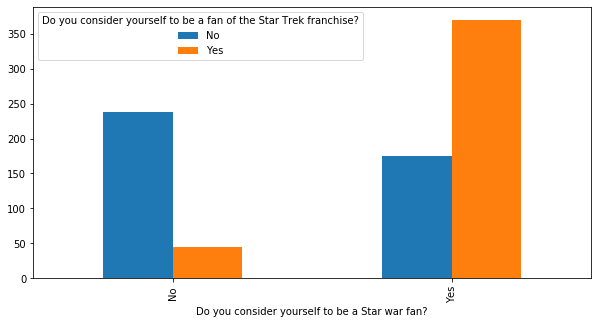

In [31]:
starwars.groupby(['Do you consider yourself to be a Star war fan?','Do you consider yourself to be a fan of the Star Trek franchise?']).size().unstack().plot(kind='bar',figsize=(10,5))

---

In [32]:
# Task 2: Data Exploration
# 3. Explore whether there are relationship between people's demographics (Gender, Age, Household Income, Education, Location) and their attitude to Start War characters. 

#Code goes after this line by adding cells

---

In [33]:
# Character Vs Gender

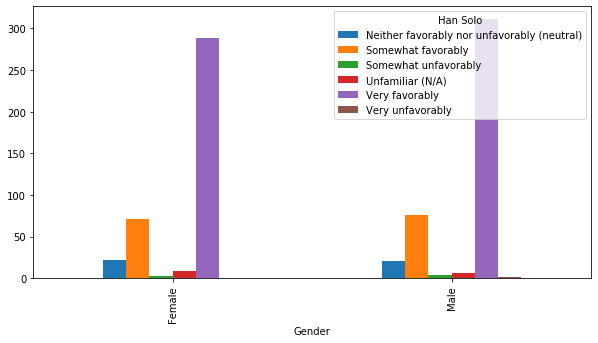

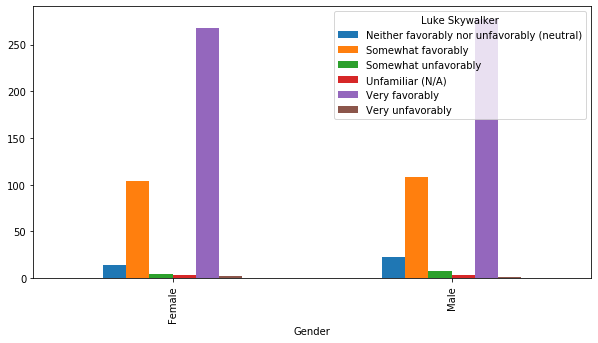

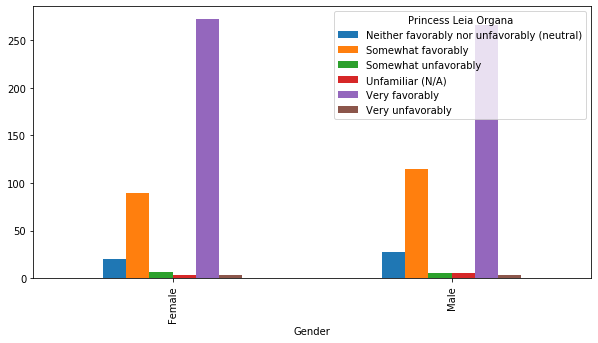

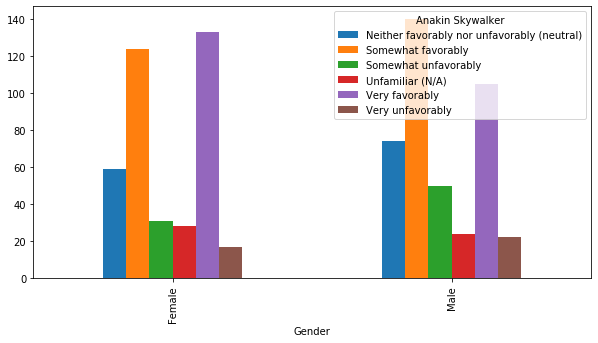

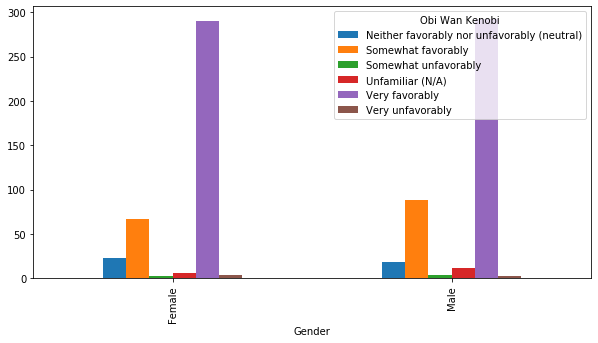

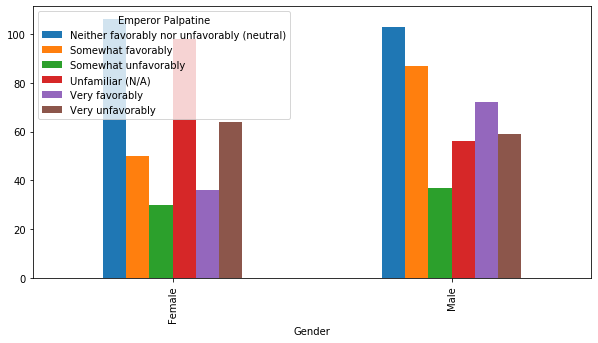

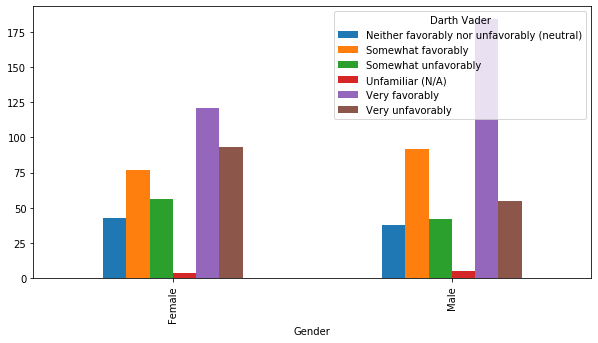

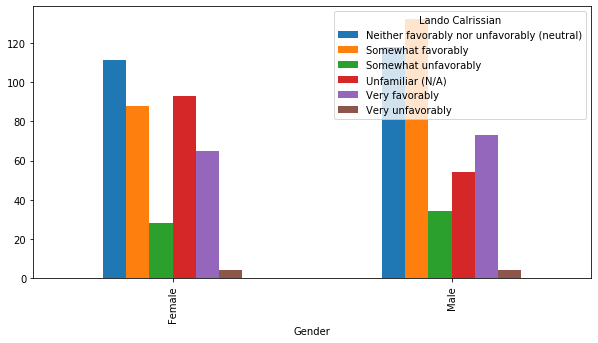

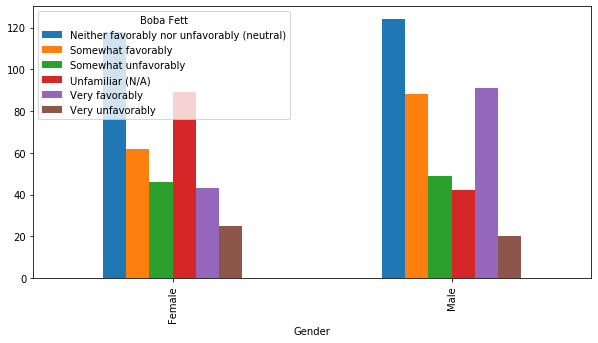

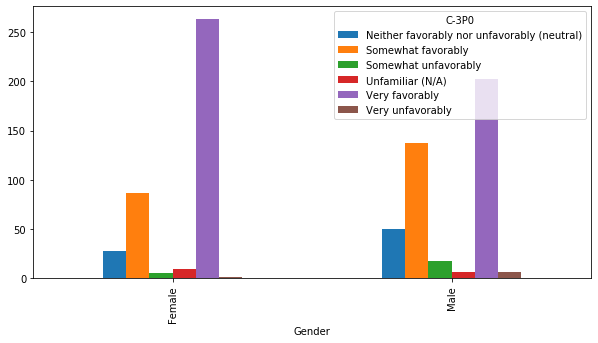

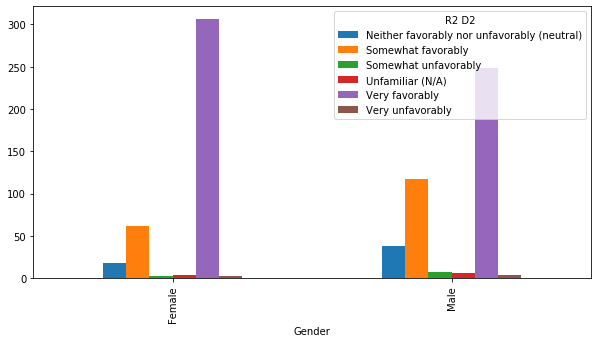

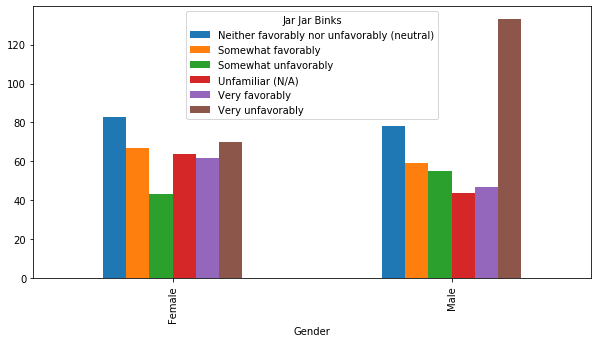

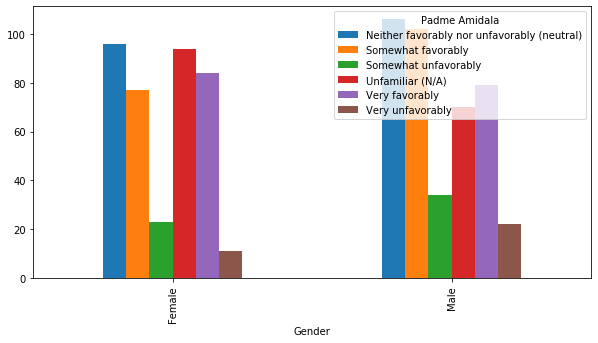

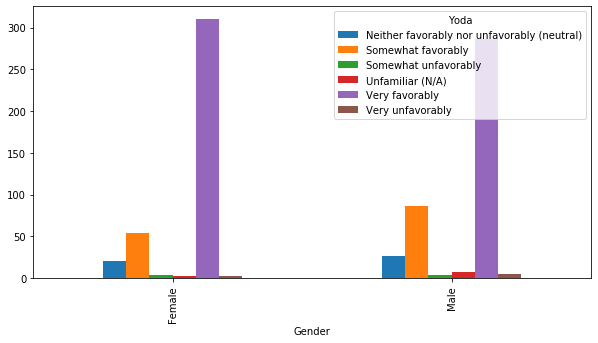

In [34]:
starwars.groupby(['Gender','Han Solo']).size().unstack().plot(kind='bar',figsize=(10,5))
starwars.groupby(['Gender','Luke Skywalker']).size().unstack().plot(kind='bar',figsize=(10,5))
starwars.groupby(['Gender','Princess Leia Organa']).size().unstack().plot(kind='bar',figsize=(10,5))
starwars.groupby(['Gender','Anakin Skywalker']).size().unstack().plot(kind='bar',figsize=(10,5))
starwars.groupby(['Gender','Obi Wan Kenobi']).size().unstack().plot(kind='bar',figsize=(10,5))
starwars.groupby(['Gender','Emperor Palpatine']).size().unstack().plot(kind='bar',figsize=(10,5))
starwars.groupby(['Gender','Darth Vader']).size().unstack().plot(kind='bar',figsize=(10,5))
starwars.groupby(['Gender','Lando Calrissian']).size().unstack().plot(kind='bar',figsize=(10,5))
starwars.groupby(['Gender','Boba Fett']).size().unstack().plot(kind='bar',figsize=(10,5))
starwars.groupby(['Gender','C-3P0']).size().unstack().plot(kind='bar',figsize=(10,5))
starwars.groupby(['Gender','R2 D2']).size().unstack().plot(kind='bar',figsize=(10,5))
starwars.groupby(['Gender','Jar Jar Binks']).size().unstack().plot(kind='bar',figsize=(10,5))
starwars.groupby(['Gender','Padme Amidala']).size().unstack().plot(kind='bar',figsize=(10,5))
starwars.groupby(['Gender','Yoda']).size().unstack().plot(kind='bar',figsize=(10,5))
plt.show()

In [35]:
# Character Vs Age

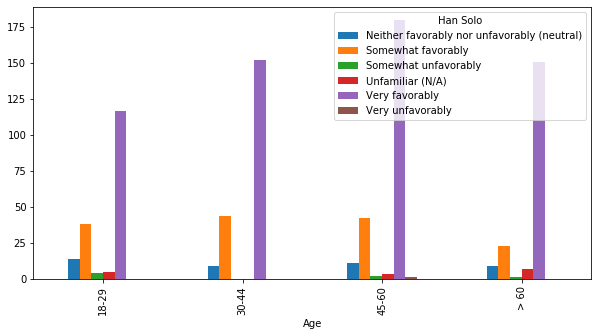

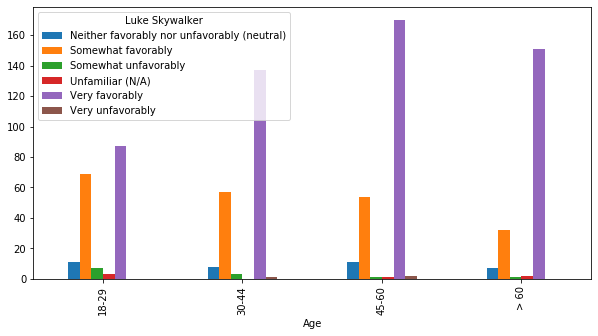

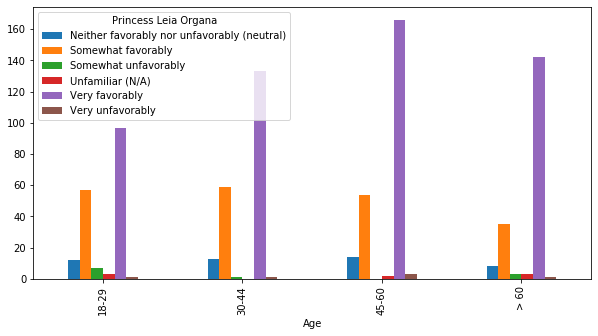

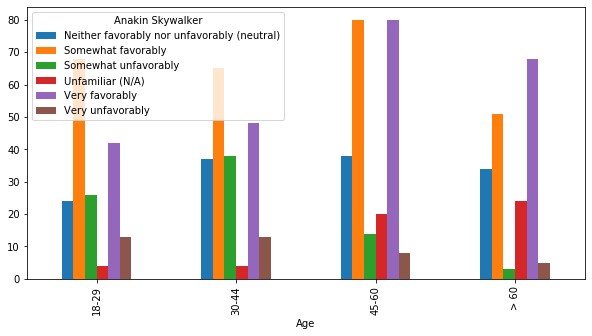

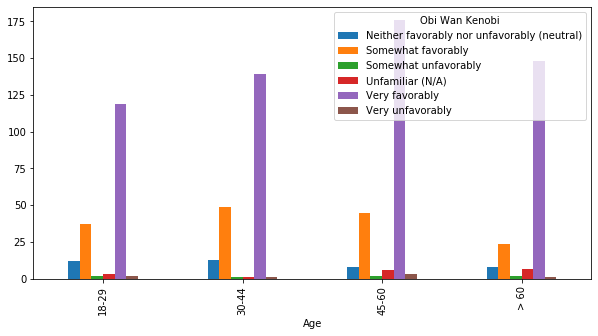

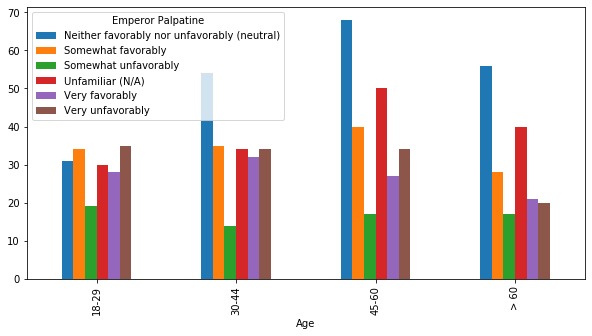

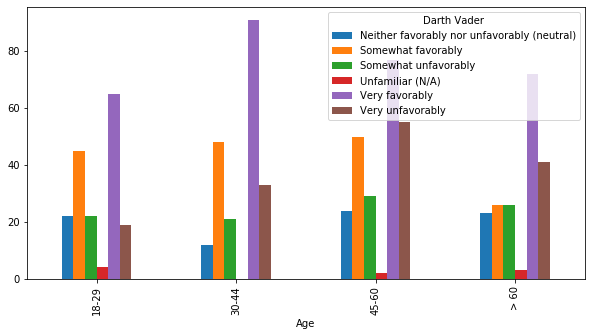

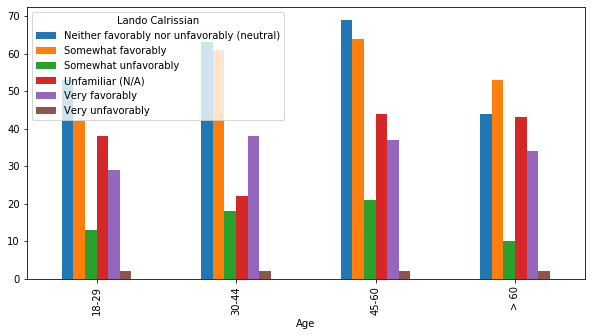

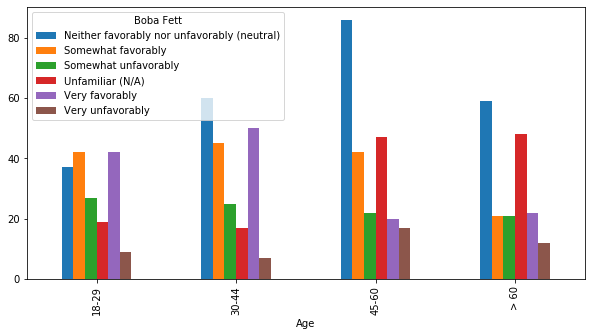

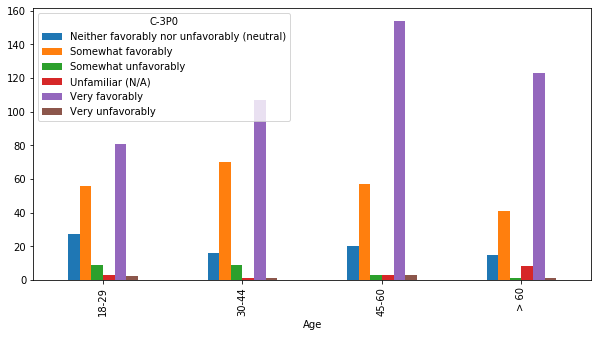

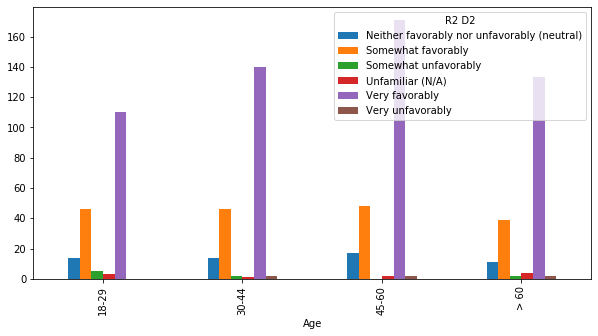

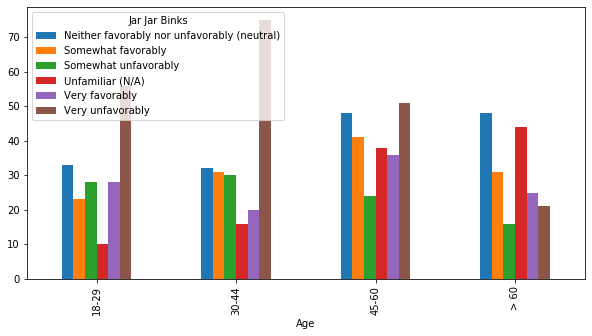

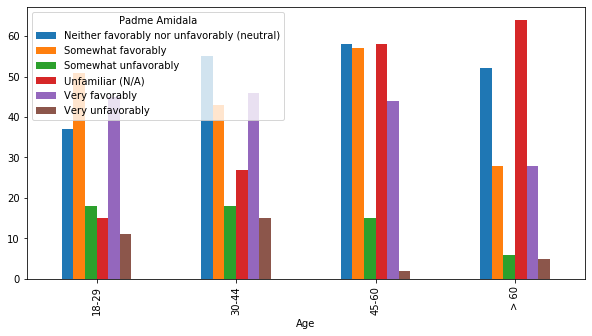

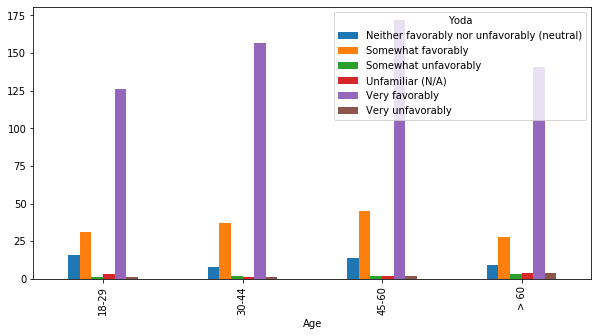

In [36]:
starwars.groupby(['Age','Han Solo']).size().unstack().plot(kind='bar',figsize=(10,5))
starwars.groupby(['Age','Luke Skywalker']).size().unstack().plot(kind='bar',figsize=(10,5))
starwars.groupby(['Age','Princess Leia Organa']).size().unstack().plot(kind='bar',figsize=(10,5))
starwars.groupby(['Age','Anakin Skywalker']).size().unstack().plot(kind='bar',figsize=(10,5))
starwars.groupby(['Age','Obi Wan Kenobi']).size().unstack().plot(kind='bar',figsize=(10,5))
starwars.groupby(['Age','Emperor Palpatine']).size().unstack().plot(kind='bar',figsize=(10,5))
starwars.groupby(['Age','Darth Vader']).size().unstack().plot(kind='bar',figsize=(10,5))
starwars.groupby(['Age','Lando Calrissian']).size().unstack().plot(kind='bar',figsize=(10,5))
starwars.groupby(['Age','Boba Fett']).size().unstack().plot(kind='bar',figsize=(10,5))
starwars.groupby(['Age','C-3P0']).size().unstack().plot(kind='bar',figsize=(10,5))
starwars.groupby(['Age','R2 D2']).size().unstack().plot(kind='bar',figsize=(10,5))
starwars.groupby(['Age','Jar Jar Binks']).size().unstack().plot(kind='bar',figsize=(10,5))
starwars.groupby(['Age','Padme Amidala']).size().unstack().plot(kind='bar',figsize=(10,5))
starwars.groupby(['Age','Yoda']).size().unstack().plot(kind='bar',figsize=(10,5))
plt.show()

In [37]:
# Character Vs Household Income

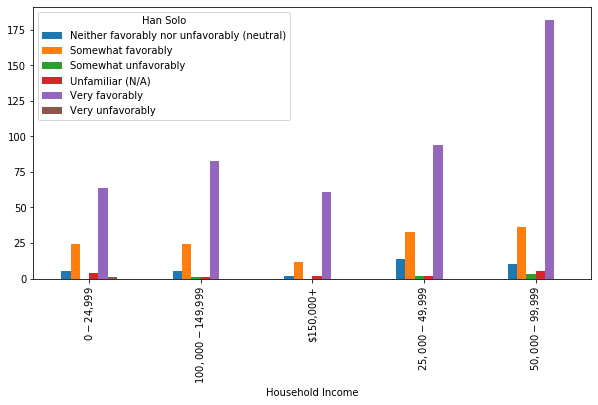

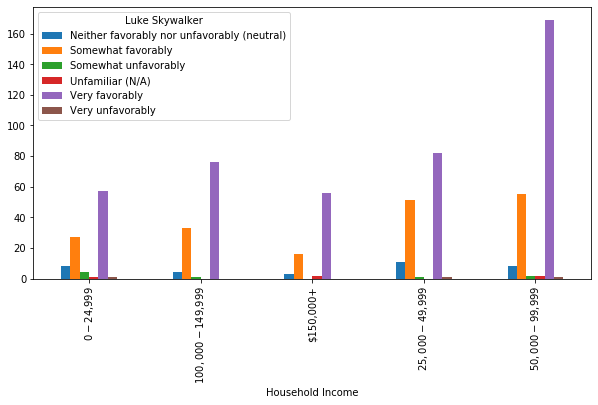

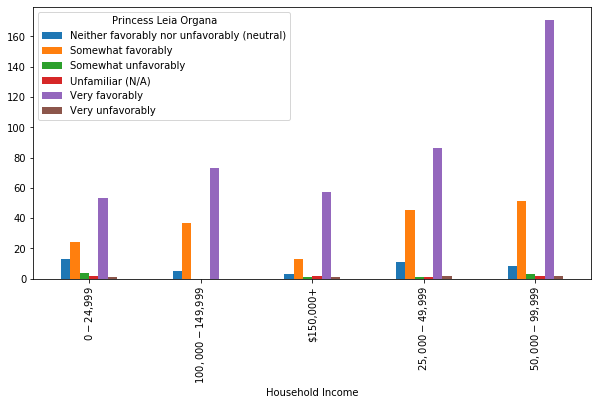

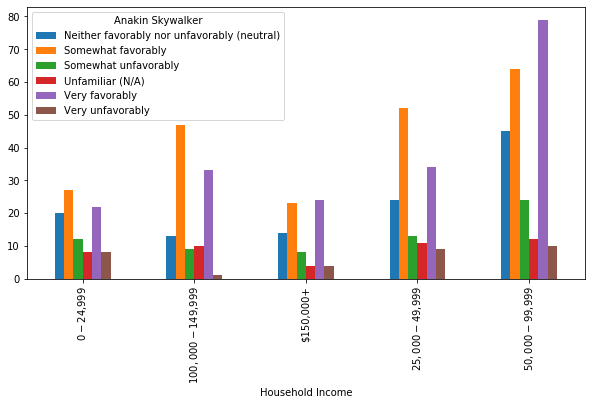

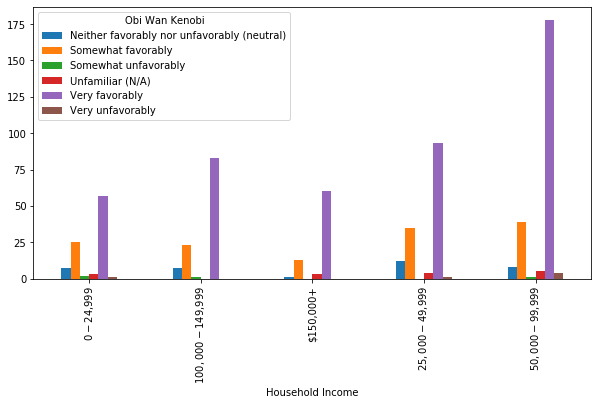

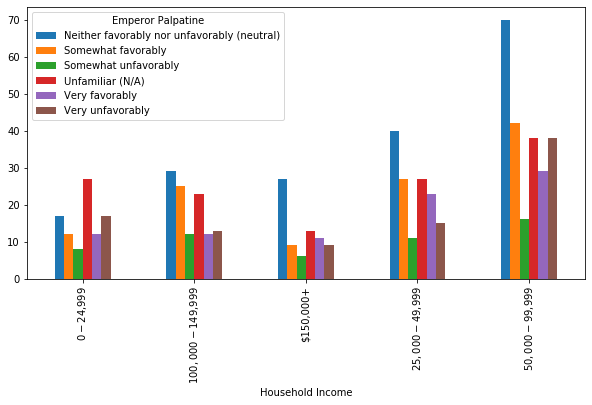

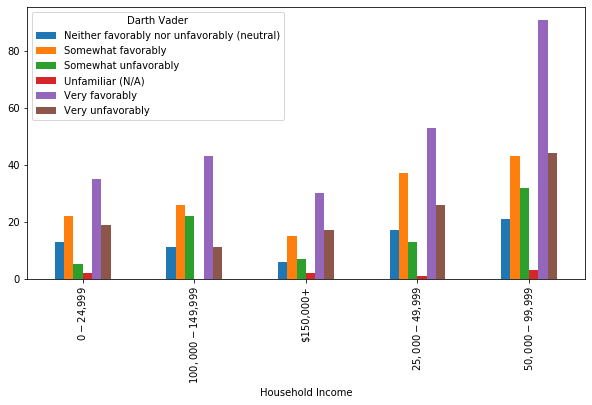

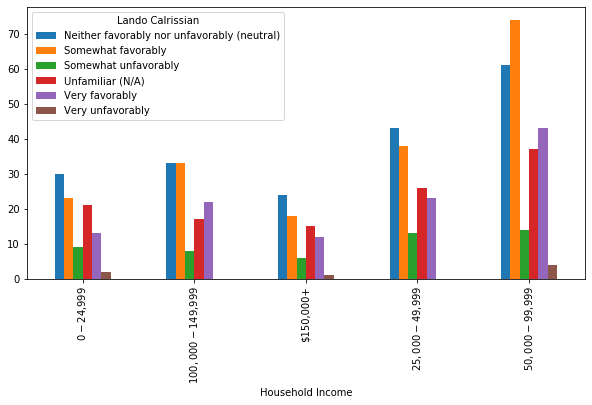

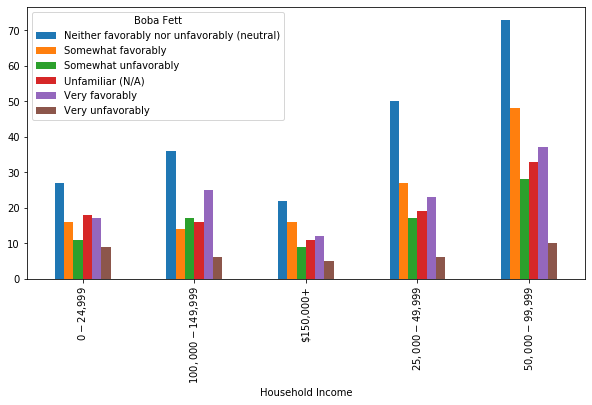

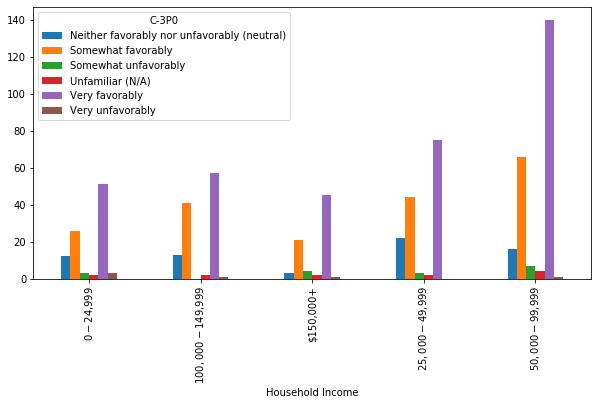

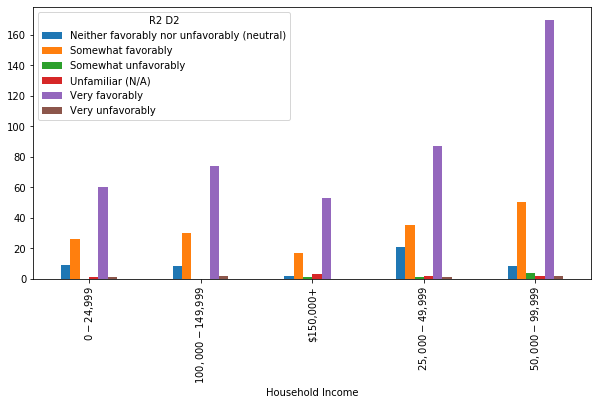

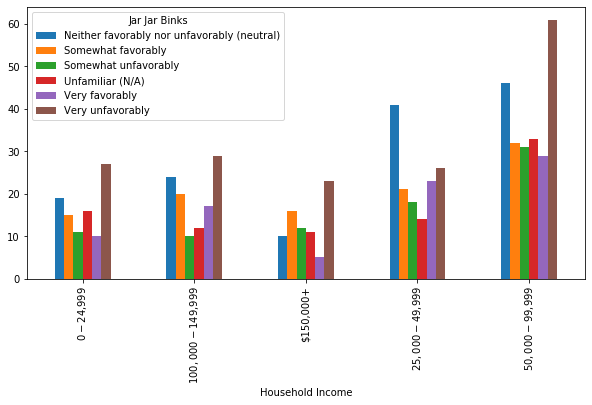

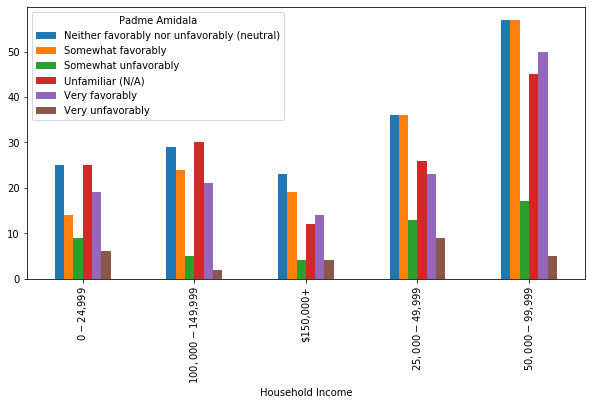

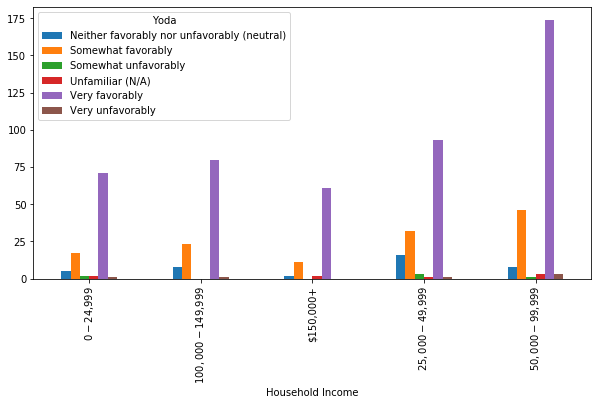

In [38]:
starwars.groupby(['Household Income','Han Solo']).size().unstack().plot(kind='bar',figsize=(10,5))
starwars.groupby(['Household Income','Luke Skywalker']).size().unstack().plot(kind='bar',figsize=(10,5))
starwars.groupby(['Household Income','Princess Leia Organa']).size().unstack().plot(kind='bar',figsize=(10,5))
starwars.groupby(['Household Income','Anakin Skywalker']).size().unstack().plot(kind='bar',figsize=(10,5))
starwars.groupby(['Household Income','Obi Wan Kenobi']).size().unstack().plot(kind='bar',figsize=(10,5))
starwars.groupby(['Household Income','Emperor Palpatine']).size().unstack().plot(kind='bar',figsize=(10,5))
starwars.groupby(['Household Income','Darth Vader']).size().unstack().plot(kind='bar',figsize=(10,5))
starwars.groupby(['Household Income','Lando Calrissian']).size().unstack().plot(kind='bar',figsize=(10,5))
starwars.groupby(['Household Income','Boba Fett']).size().unstack().plot(kind='bar',figsize=(10,5))
starwars.groupby(['Household Income','C-3P0']).size().unstack().plot(kind='bar',figsize=(10,5))
starwars.groupby(['Household Income','R2 D2']).size().unstack().plot(kind='bar',figsize=(10,5))
starwars.groupby(['Household Income','Jar Jar Binks']).size().unstack().plot(kind='bar',figsize=(10,5))
starwars.groupby(['Household Income','Padme Amidala']).size().unstack().plot(kind='bar',figsize=(10,5))
starwars.groupby(['Household Income','Yoda']).size().unstack().plot(kind='bar',figsize=(10,5))
plt.show()

In [39]:
# Character Vs Education

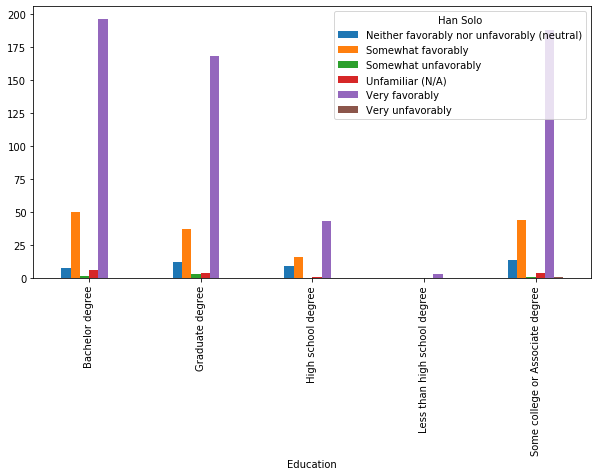

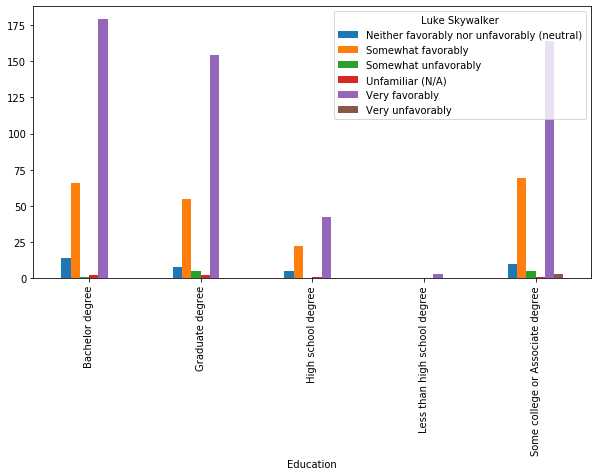

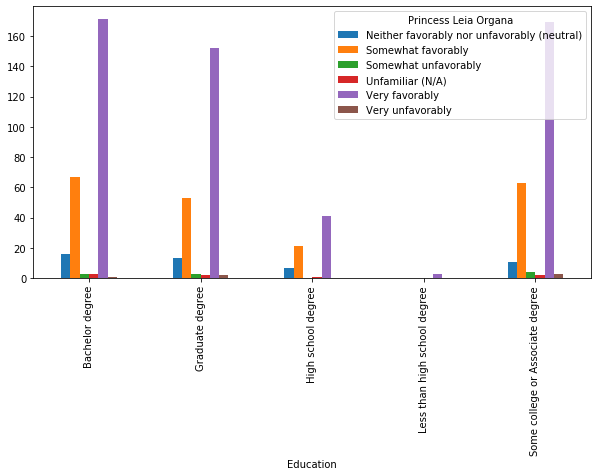

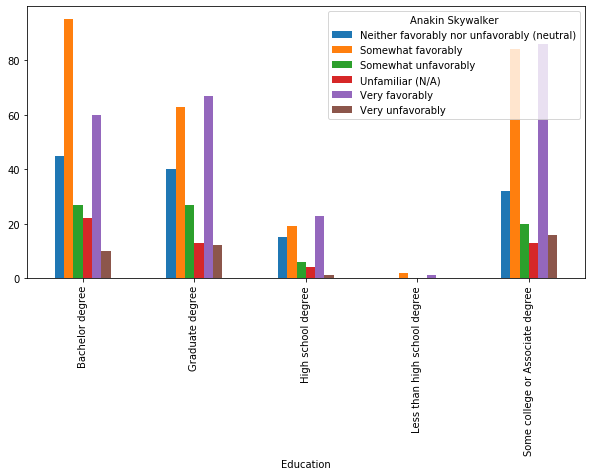

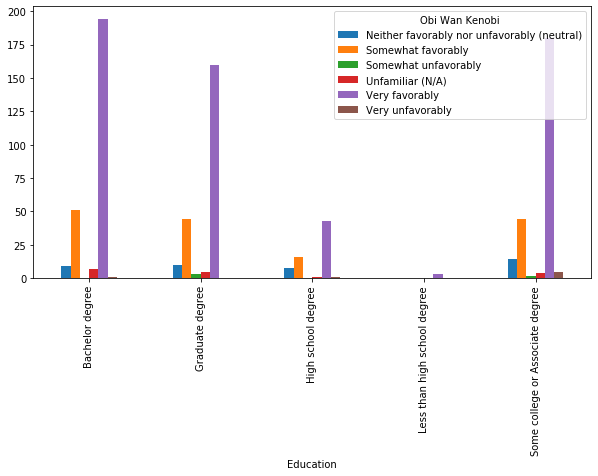

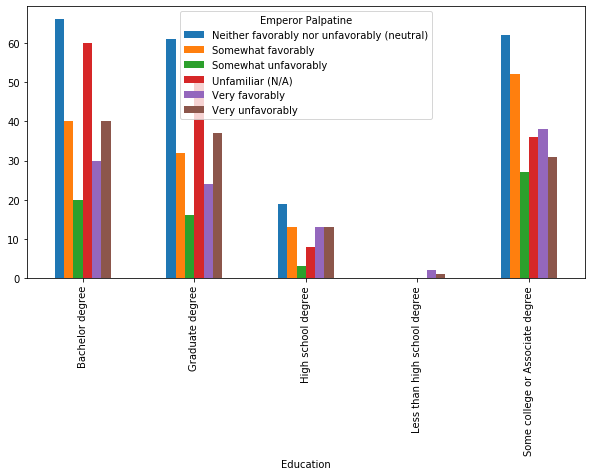

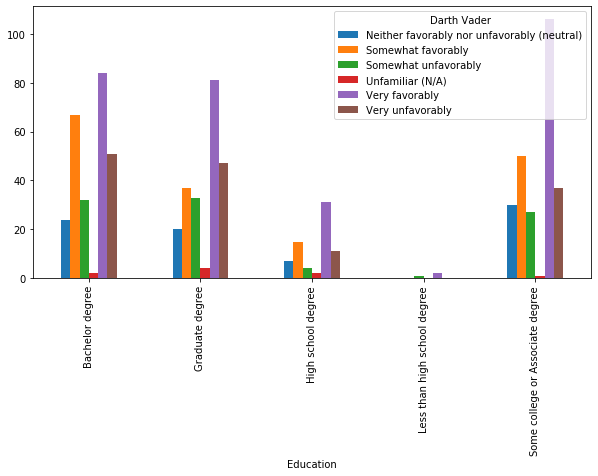

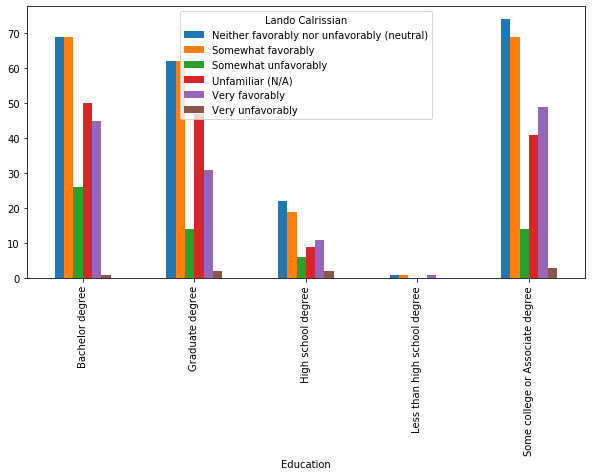

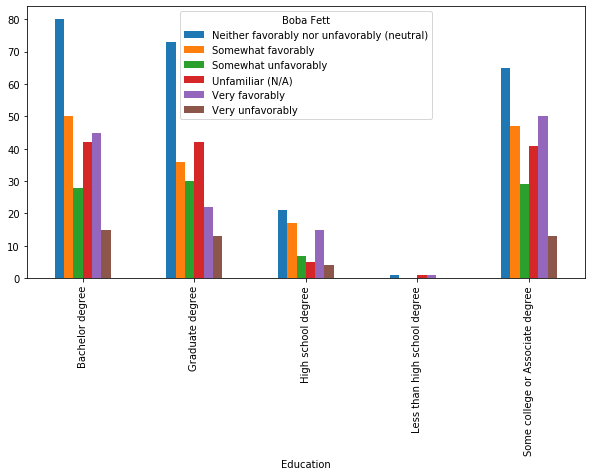

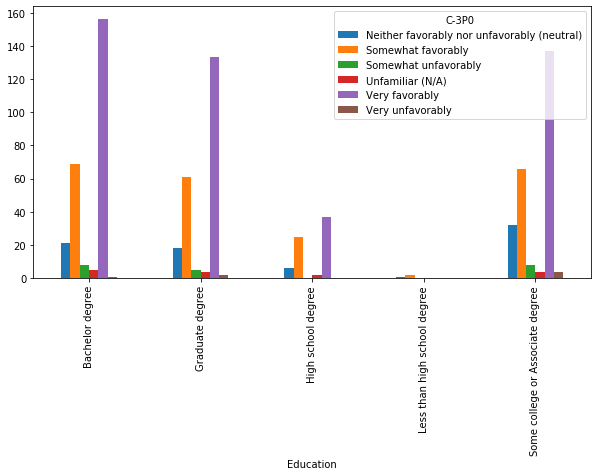

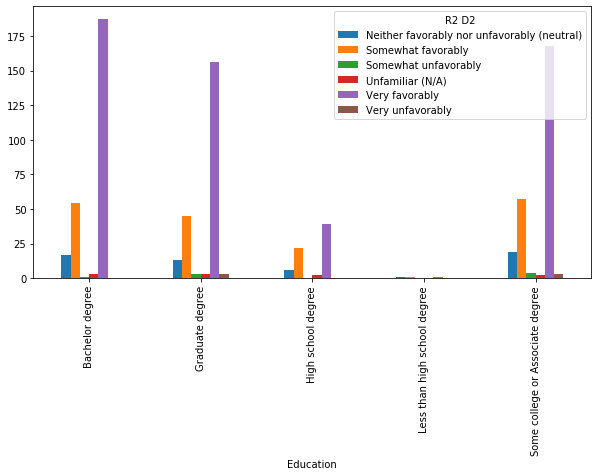

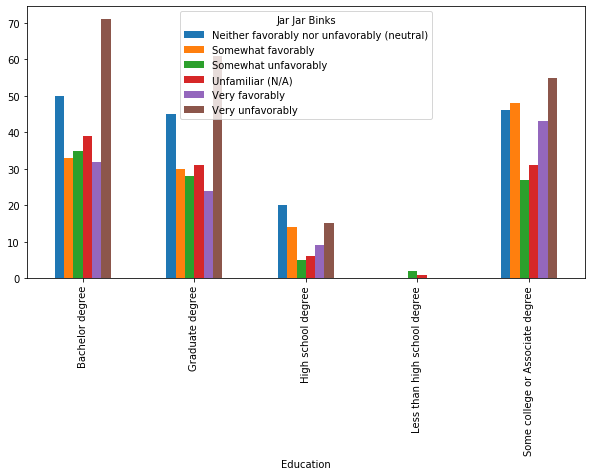

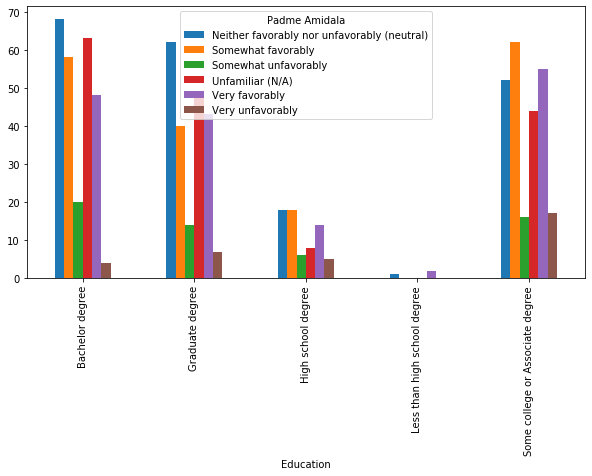

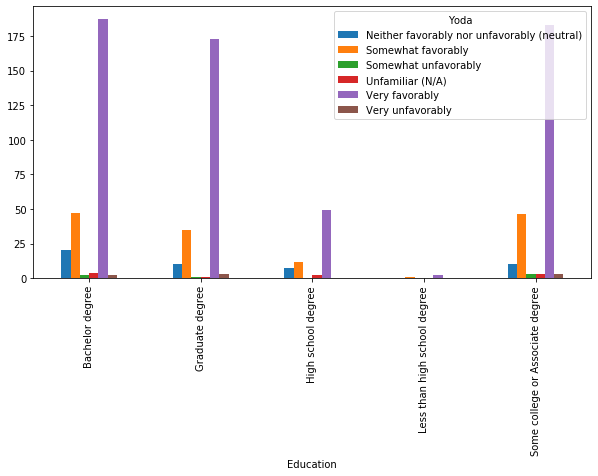

In [40]:
starwars.groupby(['Education','Han Solo']).size().unstack().plot(kind='bar',figsize=(10,5))
starwars.groupby(['Education','Luke Skywalker']).size().unstack().plot(kind='bar',figsize=(10,5))
starwars.groupby(['Education','Princess Leia Organa']).size().unstack().plot(kind='bar',figsize=(10,5))
starwars.groupby(['Education','Anakin Skywalker']).size().unstack().plot(kind='bar',figsize=(10,5))
starwars.groupby(['Education','Obi Wan Kenobi']).size().unstack().plot(kind='bar',figsize=(10,5))
starwars.groupby(['Education','Emperor Palpatine']).size().unstack().plot(kind='bar',figsize=(10,5))
starwars.groupby(['Education','Darth Vader']).size().unstack().plot(kind='bar',figsize=(10,5))
starwars.groupby(['Education','Lando Calrissian']).size().unstack().plot(kind='bar',figsize=(10,5))
starwars.groupby(['Education','Boba Fett']).size().unstack().plot(kind='bar',figsize=(10,5))
starwars.groupby(['Education','C-3P0']).size().unstack().plot(kind='bar',figsize=(10,5))
starwars.groupby(['Education','R2 D2']).size().unstack().plot(kind='bar',figsize=(10,5))
starwars.groupby(['Education','Jar Jar Binks']).size().unstack().plot(kind='bar',figsize=(10,5))
starwars.groupby(['Education','Padme Amidala']).size().unstack().plot(kind='bar',figsize=(10,5))
starwars.groupby(['Education','Yoda']).size().unstack().plot(kind='bar',figsize=(10,5))
plt.show() 

In [41]:
# Character Vs Census Region

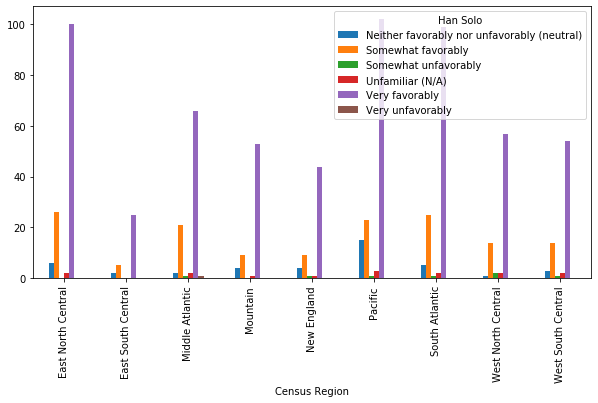

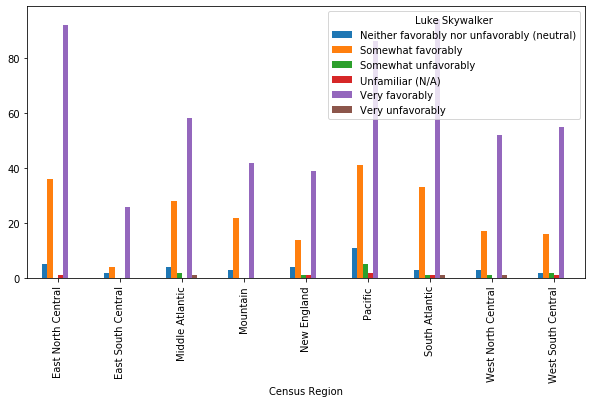

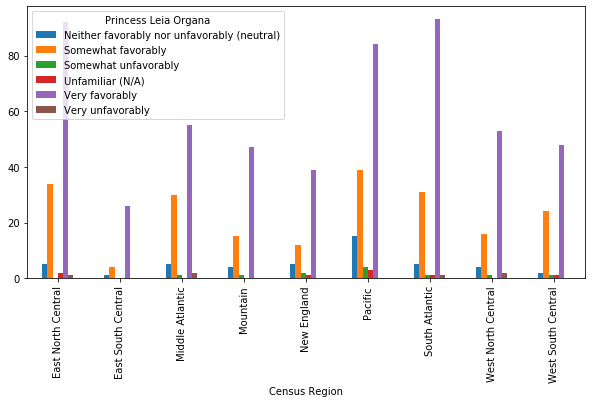

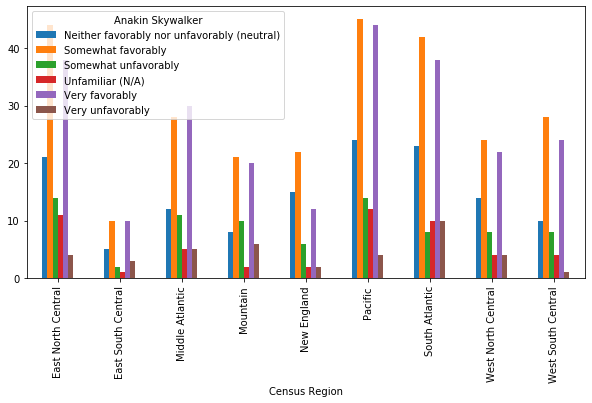

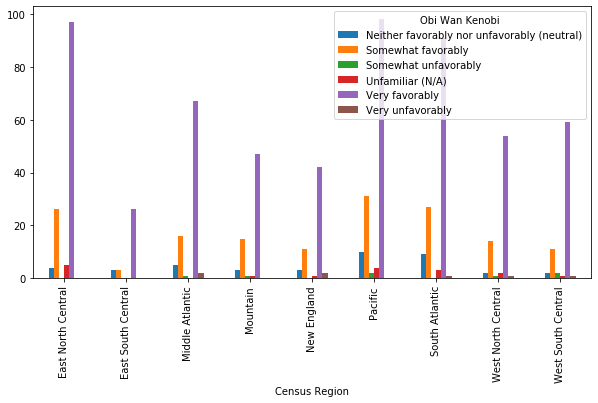

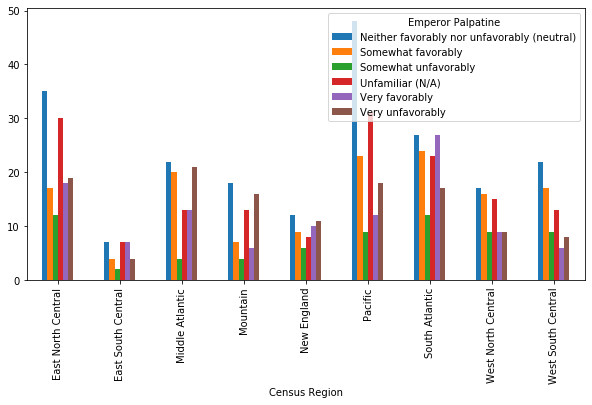

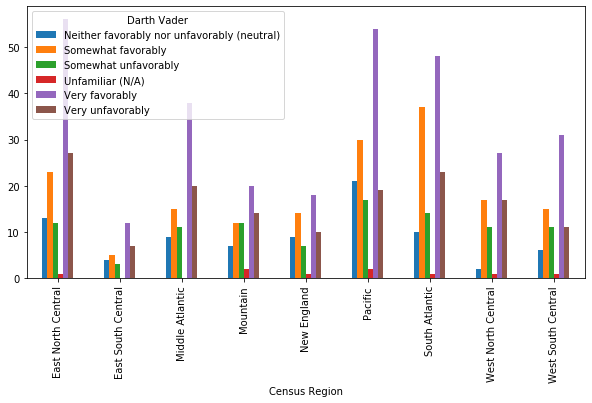

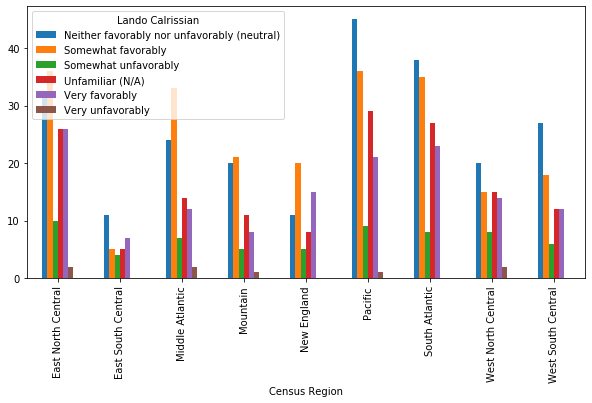

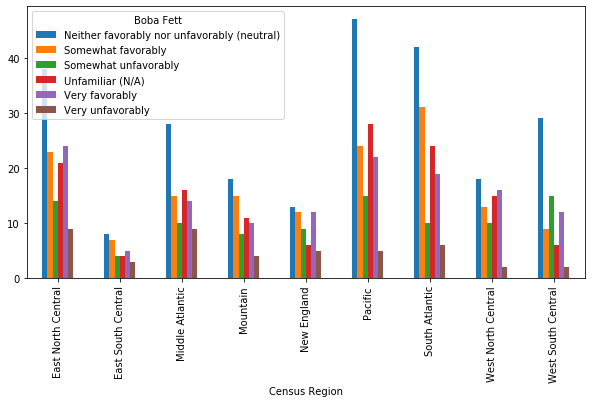

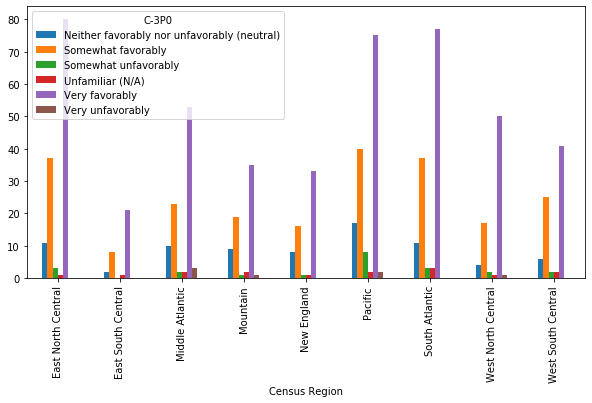

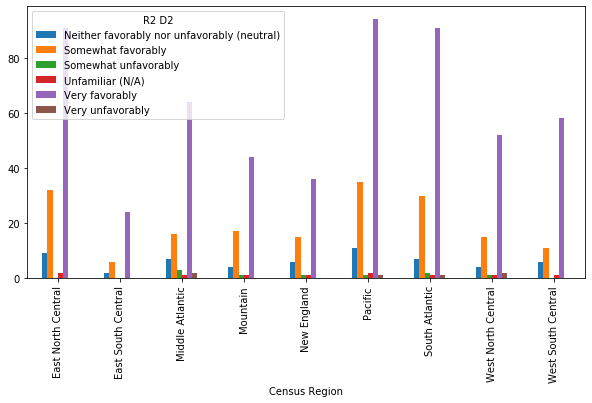

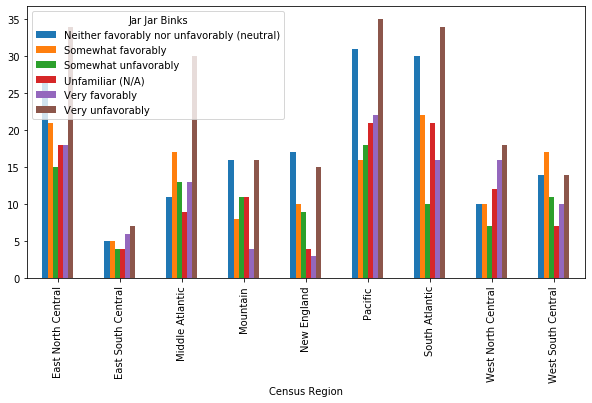

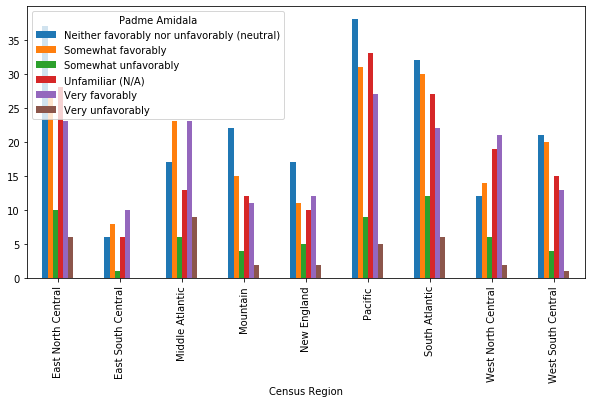

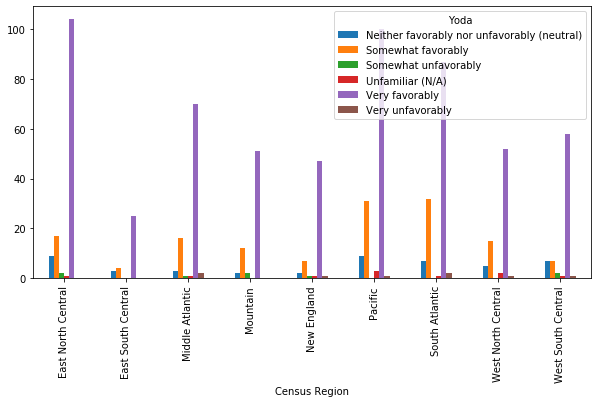

In [42]:
starwars.groupby(['Census Region','Han Solo']).size().unstack().plot(kind='bar',figsize=(10,5))
starwars.groupby(['Census Region','Luke Skywalker']).size().unstack().plot(kind='bar',figsize=(10,5))
starwars.groupby(['Census Region','Princess Leia Organa']).size().unstack().plot(kind='bar',figsize=(10,5))
starwars.groupby(['Census Region','Anakin Skywalker']).size().unstack().plot(kind='bar',figsize=(10,5))
starwars.groupby(['Census Region','Obi Wan Kenobi']).size().unstack().plot(kind='bar',figsize=(10,5))
starwars.groupby(['Census Region','Emperor Palpatine']).size().unstack().plot(kind='bar',figsize=(10,5))
starwars.groupby(['Census Region','Darth Vader']).size().unstack().plot(kind='bar',figsize=(10,5))
starwars.groupby(['Census Region','Lando Calrissian']).size().unstack().plot(kind='bar',figsize=(10,5))
starwars.groupby(['Census Region','Boba Fett']).size().unstack().plot(kind='bar',figsize=(10,5))
starwars.groupby(['Census Region','C-3P0']).size().unstack().plot(kind='bar',figsize=(10,5))
starwars.groupby(['Census Region','R2 D2']).size().unstack().plot(kind='bar',figsize=(10,5))
starwars.groupby(['Census Region','Jar Jar Binks']).size().unstack().plot(kind='bar',figsize=(10,5))
starwars.groupby(['Census Region','Padme Amidala']).size().unstack().plot(kind='bar',figsize=(10,5))
starwars.groupby(['Census Region','Yoda']).size().unstack().plot(kind='bar',figsize=(10,5))
plt.show()
 

---

---